# Question 2
## a)

Import the relevant packages

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt 

Connect to the SQLite database

In [4]:
conn = sqlite3.connect('airline9.db')

Find out which day is the best to fly in a week for each year to minimise delays.

In [5]:
# Iterate over years
for year in range(1990, 2000):
    # Read CSV file for the current year into a DataFrame
    ontime_df = pd.read_csv(f"{year}.csv")
    
    # Write DataFrame to SQLite table
    ontime_df.to_sql('ontime', conn, if_exists='append', index=False)
    
    # Calculate average delay for each hour interval of the day for each year
    time_query = f"""
        SELECT 
            '{year}' AS Year,
            CASE 
                WHEN CAST(SUBSTR(DepTime, 1, 2) AS INTEGER) BETWEEN 0 AND 5 THEN 'Late Night'
                WHEN CAST(SUBSTR(DepTime, 1, 2) AS INTEGER) BETWEEN 6 AND 11 THEN 'Morning'
                WHEN CAST(SUBSTR(DepTime, 1, 2) AS INTEGER) BETWEEN 12 AND 17 THEN 'Afternoon'
                ELSE 'Evening'
            END AS time_interval,
            AVG(ArrDelay) AS avg_delay
        FROM ontime
        WHERE ArrTime IS NOT NULL
            AND Year = '{year}'
        GROUP BY time_interval
        ORDER BY avg_delay ASC
    """
    
    # Execute and fetch results
    time_result = pd.read_sql_query(time_query, conn)
    
    # Print results for each year
    print(time_result)

   Year time_interval  avg_delay
0  1990       Morning   5.406943
1  1990     Afternoon   6.809562
2  1990       Evening   7.117921
3  1990    Late Night  21.627247
   Year time_interval  avg_delay
0  1991       Morning   3.572275
1  1991       Evening   4.806749
2  1991     Afternoon   4.986817
3  1991    Late Night  23.430752
   Year time_interval  avg_delay
0  1992       Morning   3.809061
1  1992     Afternoon   4.807512
2  1992       Evening   5.176801
3  1992    Late Night  19.789169
   Year time_interval  avg_delay
0  1993       Morning   3.912941
1  1993       Evening   5.449163
2  1993     Afternoon   5.633302
3  1993    Late Night  19.603741
   Year time_interval  avg_delay
0  1994       Morning   3.804415
1  1994       Evening   5.864040
2  1994     Afternoon   5.958293
3  1994    Late Night  33.644348
   Year time_interval  avg_delay
0  1995       Morning   5.118262
1  1995       Evening   7.209200
2  1995     Afternoon   7.365358
3  1995    Late Night  31.470687
   Year ti

Further find the best hour in the morning to fly.

In [6]:
for year in range(1990, 2000):
    # Query to calculate average delay for each hourly interval of the morning for each year
    hour_query = f"""
        SELECT 
            '{year}' AS Year,
            CASE 
                WHEN CAST(SUBSTR(DepTime, 1, 2) AS INTEGER) BETWEEN 6 AND 6 THEN '06:00-07:00'
                WHEN CAST(SUBSTR(DepTime, 1, 2) AS INTEGER) BETWEEN 7 AND 7 THEN '07:00-08:00'
                WHEN CAST(SUBSTR(DepTime, 1, 2) AS INTEGER) BETWEEN 8 AND 8 THEN '08:00-09:00'
                WHEN CAST(SUBSTR(DepTime, 1, 2) AS INTEGER) BETWEEN 9 AND 9 THEN '09:00-10:00'
                WHEN CAST(SUBSTR(DepTime, 1, 2) AS INTEGER) BETWEEN 10 AND 10 THEN '10:00-11:00'
                WHEN CAST(SUBSTR(DepTime, 1, 2) AS INTEGER) BETWEEN 11 AND 11 THEN '11:00-12:00'
                ELSE NULL
            END AS hour_interval,
            AVG(ArrDelay) AS avg_delay
        FROM ontime
        WHERE ArrTime IS NOT NULL
            AND Year = {year}
            AND CAST(SUBSTR(DepTime, 1, 2) AS INTEGER) BETWEEN 6 AND 11
        GROUP BY hour_interval
        ORDER BY avg_delay ASC
    """
     # Execute and fetch results
    hour_result = pd.read_sql_query(hour_query, conn)
    
    # Print results for each year
    print(hour_result)
    

   Year hour_interval  avg_delay
0  1990   11:00-12:00   5.190108
1  1990   10:00-11:00   5.521279
2  1990   06:00-07:00  33.612457
3  1990   08:00-09:00  37.808260
4  1990   09:00-10:00  38.698347
5  1990   07:00-08:00  38.879845
   Year hour_interval  avg_delay
0  1991   11:00-12:00   3.313516
1  1991   10:00-11:00   3.760542
2  1991   06:00-07:00  20.754647
3  1991   08:00-09:00  22.541096
4  1991   07:00-08:00  27.954887
5  1991   09:00-10:00  30.661479
   Year hour_interval  avg_delay
0  1992   11:00-12:00   3.259383
1  1992   10:00-11:00   4.320952
2  1992   09:00-10:00  20.854430
3  1992   08:00-09:00  21.394822
4  1992   06:00-07:00  21.926045
5  1992   07:00-08:00  24.923345
   Year hour_interval  avg_delay
0  1993   11:00-12:00   3.752094
1  1993   10:00-11:00   4.013627
2  1993   09:00-10:00  16.792727
3  1993   06:00-07:00  22.332075
4  1993   08:00-09:00  22.912903
5  1993   07:00-08:00  25.875000
   Year hour_interval  avg_delay
0  1994   11:00-12:00   3.732539
1  1994   

Create ontime dataframe and table then find out the best time interval to fly in a day for each year to minimise delays.

In [5]:
# Iterate over years
for year in range(1990, 2000):
    # Calculate average delay for each day of the week for each year
    day_query = f"""
        SELECT 
            '{year}' AS Year,
            DayOfWeek,
            AVG(ArrDelay) AS avg_delay
        FROM ontime
        WHERE ArrDelay IS NOT NULL
            AND Year = '{year}'
        GROUP BY DayOfWeek
        ORDER BY avg_delay ASC
    """
    
    # Execute and fetch results
    day_result = pd.read_sql_query(day_query, conn)
    
    # Print results for each year
    print(day_result)

   Year  DayOfWeek  avg_delay
0  1990          1   4.828362
1  1990          7   4.968548
2  1990          6   5.241656
3  1990          2   5.383391
4  1990          3   5.942437
5  1990          4   9.968819
6  1990          5  11.170785
   Year  DayOfWeek  avg_delay
0  1991          6   3.186903
1  1991          1   3.391235
2  1991          7   4.028397
3  1991          2   4.168541
4  1991          3   5.377385
5  1991          4   6.018254
6  1991          5   6.789780
   Year  DayOfWeek  avg_delay
0  1992          6   2.698244
1  1992          1   3.538463
2  1992          7   3.799903
3  1992          2   4.707771
4  1992          3   5.422945
5  1992          5   6.571092
6  1992          4   7.095474
   Year  DayOfWeek  avg_delay
0  1993          6   3.106624
1  1993          2   4.751533
2  1993          7   4.902908
3  1993          1   5.087213
4  1993          3   6.187438
5  1993          4   6.394683
6  1993          5   6.701889
   Year  DayOfWeek  avg_delay
0  1994   

Find out the best month to fly for each year.

    Year  Month  avg_delay
0   1990     11   3.112666
1   1990      9   3.774463
2   1990     10   4.856797
3   1990      4   5.033032
4   1990      5   5.924553
5   1990      7   6.307506
6   1990      6   6.850147
7   1990      1   7.284448
8   1990      8   7.731526
9   1990      3   8.251549
10  1990      2  10.526860
11  1990     12  12.548941


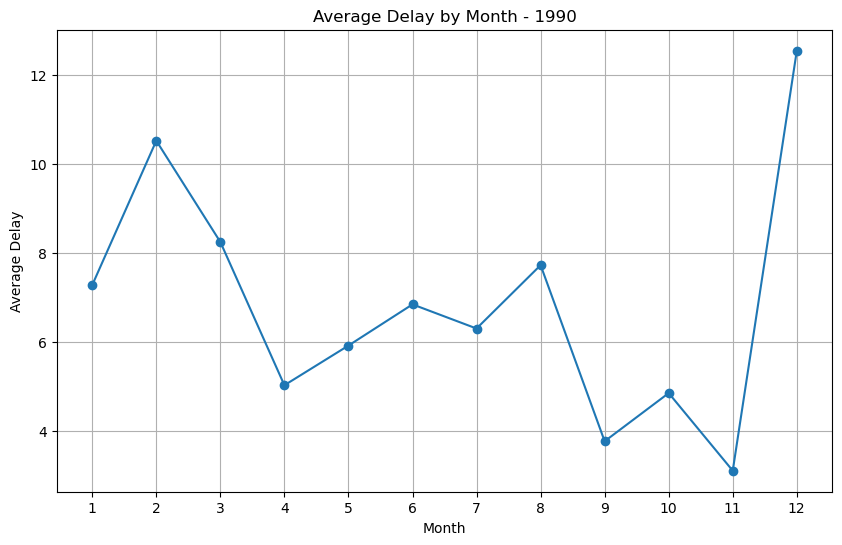

    Year  Month  avg_delay
0   1991      9   1.889471
1   1991      6   3.525925
2   1991      4   4.252473
3   1991      2   4.319880
4   1991     11   4.408046
5   1991      7   4.439263
6   1991      5   4.518790
7   1991      8   4.622741
8   1991     10   4.671751
9   1991      3   5.234036
10  1991     12   5.689880
11  1991      1   9.245960


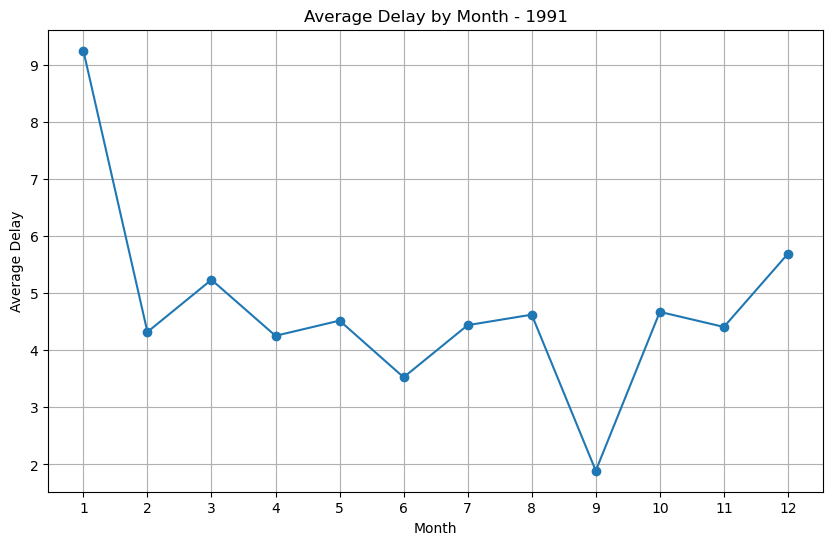

    Year  Month  avg_delay
0   1992      4   2.152639
1   1992      5   2.288442
2   1992     10   2.470446
3   1992      2   3.794284
4   1992      9   4.046326
5   1992     11   4.051754
6   1992      1   4.545460
7   1992      3   5.214632
8   1992      6   6.375443
9   1992      8   6.786314
10  1992      7   7.826193
11  1992     12   8.735340


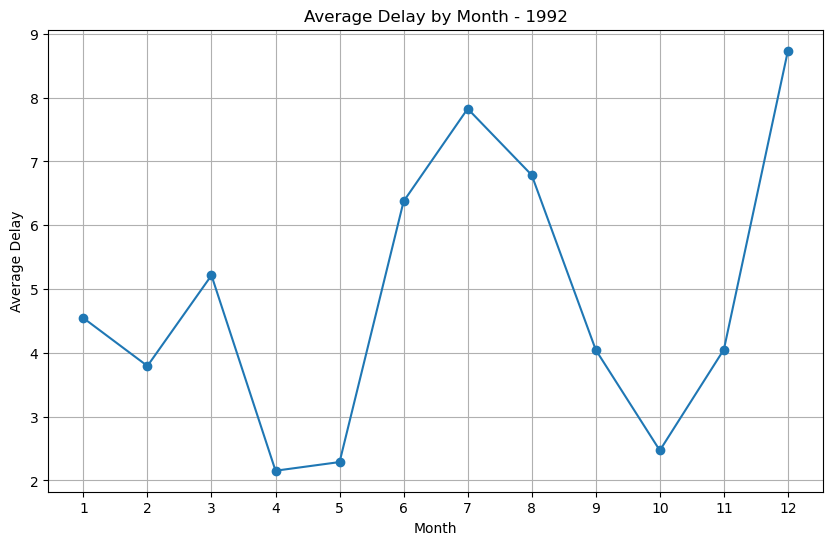

    Year  Month  avg_delay
0   1993      5   2.614719
1   1993      7   2.940931
2   1993      9   3.847942
3   1993      8   4.311616
4   1993     10   4.772795
5   1993      4   5.280435
6   1993      6   5.307972
7   1993     11   5.535920
8   1993     12   6.520567
9   1993      1   6.542757
10  1993      2   7.478846
11  1993      3   9.434264


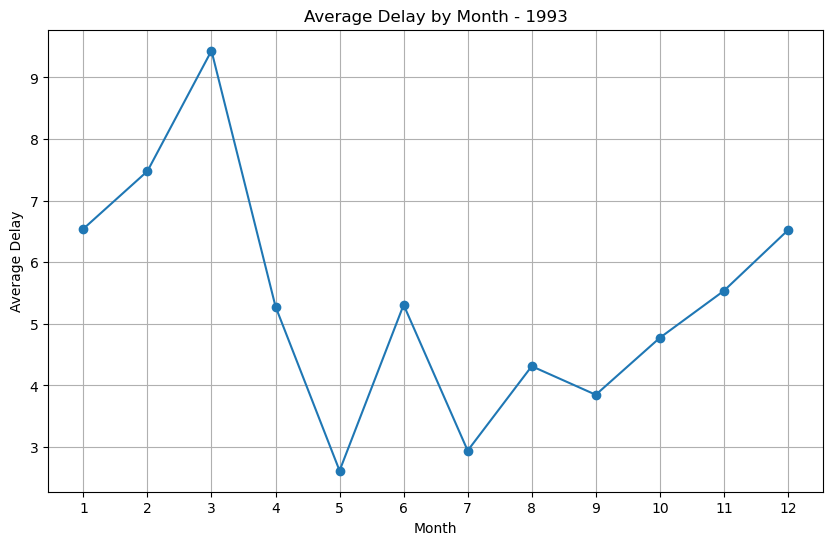

    Year  Month  avg_delay
0   1994      9   2.033572
1   1994      5   2.345744
2   1994     10   3.494441
3   1994      3   4.509724
4   1994      8   5.211513
5   1994      4   5.311020
6   1994     11   5.577381
7   1994     12   5.978600
8   1994      6   6.609870
9   1994      7   7.877674
10  1994      2   9.211639
11  1994      1  10.700433


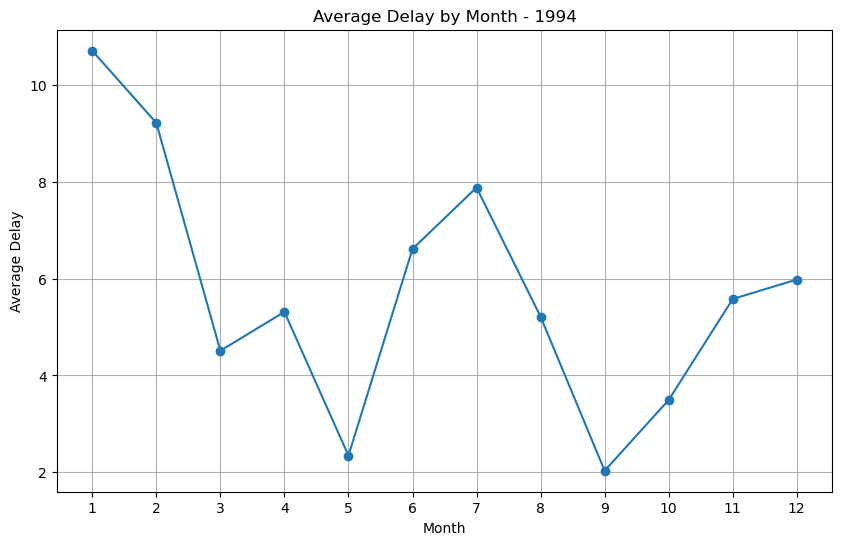

    Year  Month  avg_delay
0   1995      9   2.788236
1   1995     10   5.006480
2   1995      4   5.721104
3   1995      5   5.916194
4   1995      2   6.123782
5   1995      3   6.202394
6   1995      7   6.732256
7   1995      8   6.745036
8   1995     11   7.285089
9   1995      1   8.920879
10  1995      6   8.930839
11  1995     12  13.923247


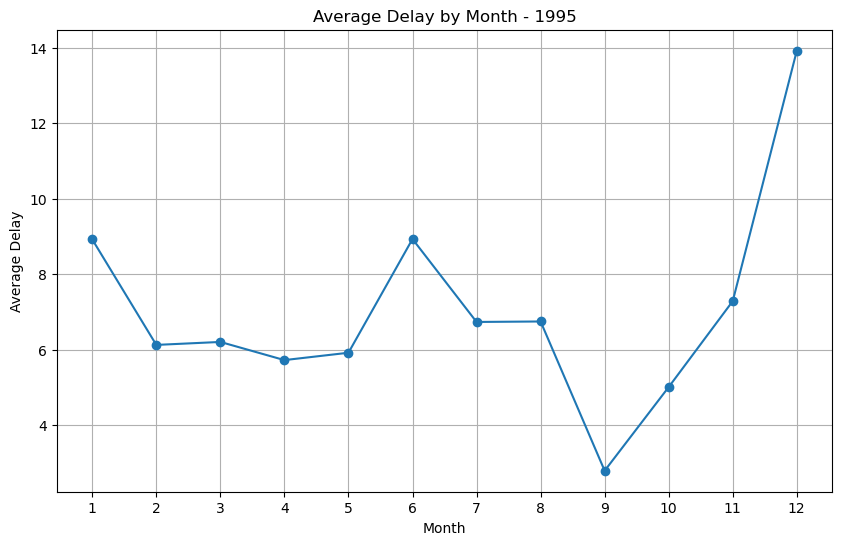

    Year  Month  avg_delay
0   1996      4   6.629110
1   1996      9   6.973129
2   1996     11   7.082903
3   1996      5   7.562187
4   1996     10   8.126869
5   1996      3   8.553100
6   1996      8  10.132484
7   1996      7  10.192904
8   1996      2  10.240680
9   1996      6  10.404088
10  1996     12  14.657531
11  1996      1  15.667793


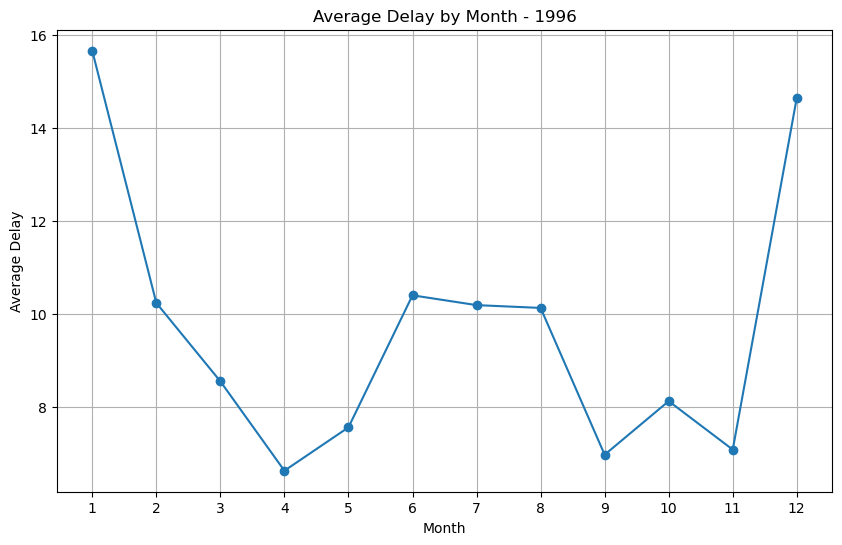

    Year  Month  avg_delay
0   1997      9   3.205117
1   1997      5   4.876920
2   1997     10   5.108124
3   1997     11   6.830425
4   1997      4   6.948860
5   1997      3   7.311369
6   1997      8   7.543670
7   1997      7   8.338540
8   1997      2   9.014008
9   1997      6   9.190313
10  1997     12   9.383224
11  1997      1  12.290145


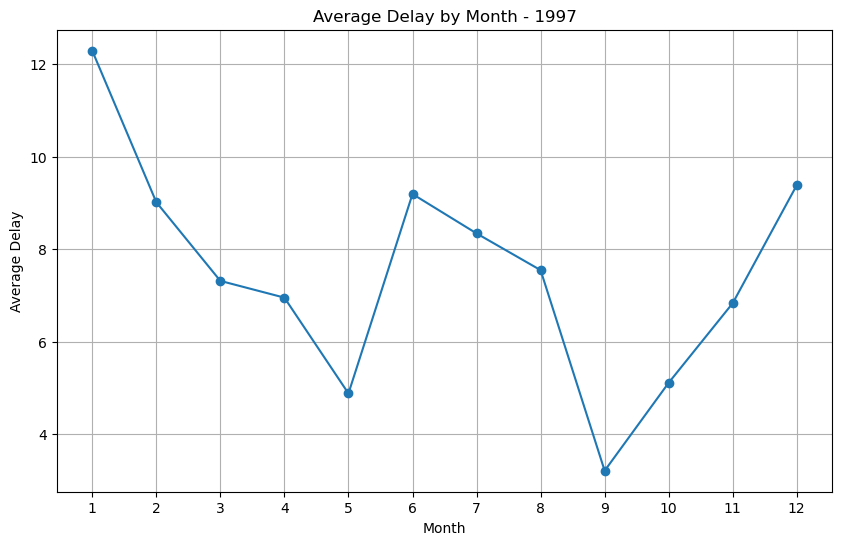

    Year  Month  avg_delay
0   1998     11   3.224671
1   1998      9   3.351196
2   1998     10   5.012701
3   1998      4   6.755875
4   1998      7   7.468303
5   1998      2   8.023859
6   1998      8   8.155330
7   1998      5   8.372693
8   1998      1   8.481482
9   1998      3   8.560124
10  1998     12   9.537161
11  1998      6  13.873547


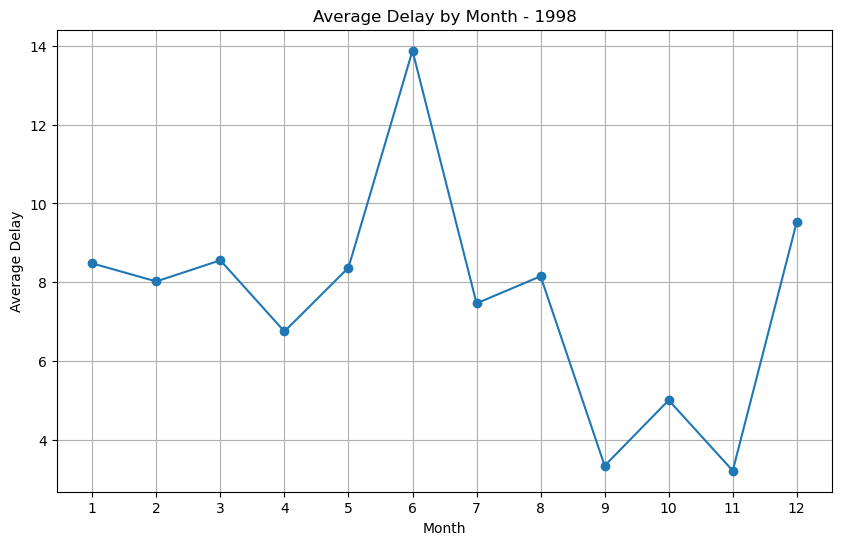

    Year  Month  avg_delay
0   1999     11   4.009311
1   1999      2   5.024821
2   1999      9   5.179291
3   1999     10   5.468607
4   1999     12   5.815680
5   1999      3   6.690389
6   1999      8   8.769282
7   1999      4   8.828769
8   1999      5   9.004984
9   1999      1  13.224619
10  1999      7  13.247067
11  1999      6  13.693985


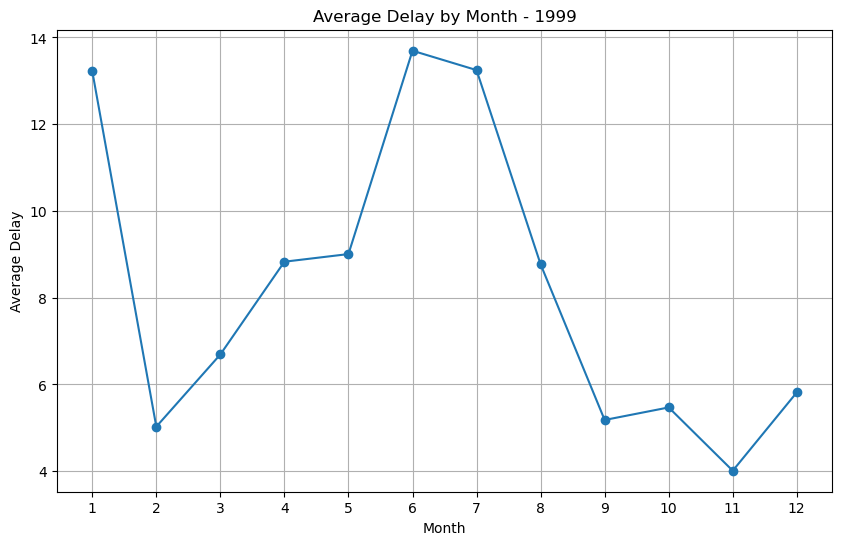

In [6]:
# Iterate over years
for year in range(1990, 2000):
    # Calculate average delay for each month of the year for each year
    month_query = f"""
        SELECT 
            '{year}' AS Year,
            Month,
            AVG(ArrDelay) AS avg_delay
        FROM ontime
        WHERE ArrDelay IS NOT NULL
            AND Year = '{year}'
        GROUP BY Month
        ORDER BY avg_delay ASC
    """
    
    # Execute and fetch results
    month_result = pd.read_sql_query(month_query, conn)
    
    # Print results for each year
    print(month_result)
    
    # Sort the DataFrame by month
    month_result = month_result.sort_values(by='Month')
    
    # Plot results for each year
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.plot(month_result['Month'], month_result['avg_delay'], marker='o')
    plt.title(f'Average Delay by Month - {year}')
    plt.xlabel('Month')
    plt.ylabel('Average Delay')
    plt.xticks(month_result['Month'])  # Ensure all months are shown on x-axis
    plt.grid(True)
    plt.show()

In [7]:
# Close connection
conn.close()